In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

In [5]:
fld=open(os.path.join("../data","LD2011_2014.txt"),"r")
data=[]
cid=250
while True:
    line=fld.readline()
    if not line:
        break
    if line.startswith('"";'):
        continue
    cols=[float(re.sub(",",".",x)) for x in line.strip().split(";")[1:]]
    data.append(cols[cid])

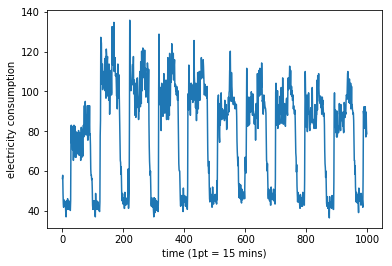

In [8]:
NUM_ENTRIES=1000
plt.plot(range(NUM_ENTRIES),data[0:NUM_ENTRIES])
plt.ylabel("electricity consumption")
plt.xlabel("time (1pt = 15 mins)")
plt.savefig("Electricity_Consumption.png")

np.save(os.path.join("../data","LD_250.npy"),np.array(data))

In [5]:
from keras.layers.core import Dense
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import math
import os
from keras.utils import plot_model

/home/drdh/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
data=np.load(os.path.join("../data","LD_250.npy"))
data=data.reshape(-1,1)
scaler=MinMaxScaler(feature_range=(0,1),copy=False)
data=scaler.fit_transform(data)

In [13]:
NUM_TIMESTEPS=20
HIDDEN_SIZE=10
BATCH_SIZE=96

X=np.zeros((data.shape[0],NUM_TIMESTEPS))
Y=np.zeros((data.shape[0],1))
for i in range(len(data)-NUM_TIMESTEPS-1):
    X[i]=data[i:i+NUM_TIMESTEPS].T
    Y[i]=data[i+NUM_TIMESTEPS+1]
X=np.expand_dims(X,axis=2)

In [16]:
sp=int(0.7*len(data))
Xtrain,Xtest,Ytrain,Ytest=X[0:sp],X[sp:],Y[0:sp],Y[sp:]

In [23]:
#stateless
NUM_EPOCHS=5
model=Sequential()
model.add(LSTM(HIDDEN_SIZE,input_shape=(NUM_TIMESTEPS,1),return_sequences=False))
model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam",metrics=["mean_squared_error"])

model.fit(Xtrain,Ytrain,epochs=NUM_EPOCHS,batch_size=BATCH_SIZE,validation_data=(Xtest,Ytest))


Train on 98179 samples, validate on 42077 samples
Epoch 1/5
98179/98179 [==============================] - 22s 225us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 2/5
98179/98179 [==============================] - 21s 217us/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 3/5
98179/98179 [==============================] - 21s 218us/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 4/5
98179/98179 [==============================] - 21s 215us/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 5/5
98179/98179 [==============================] - 21s 214us/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0033 - val_mean_squared_error: 0.0033


In [24]:
#stateful
NUM_EPOCHS=5
model=Sequential()
model.add(LSTM(HIDDEN_SIZE,stateful=True,batch_input_shape=(BATCH_SIZE,NUM_TIMESTEPS,1),return_sequences=False))
model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam",metrics=["mean_squared_error"])

train_size=(Xtrain.shape[0] // BATCH_SIZE ) * BATCH_SIZE
test_size=(Xtest.shape[0] // BATCH_SIZE) * BATCH_SIZE
Xtrain,Ytrain=Xtrain[0:train_size],Ytrain[0:train_size]
Xtest,Ytest=Xtest[0:test_size],Ytest[0:test_size]

for i in range(NUM_EPOCHS):
    print("Epoch {:d}/{:d}".format(i+1,NUM_EPOCHS))
    model.fit(Xtrain,Ytrain,batch_size=BATCH_SIZE,epochs=1,validation_data=(Xtest,Ytest),shuffle=False)
    model.reset_states()

Epoch 1/5
Train on 98112 samples, validate on 42048 samples
Epoch 1/1
98112/98112 [==============================] - 15s 150us/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 2/5
Train on 98112 samples, validate on 42048 samples
Epoch 1/1
98112/98112 [==============================] - 15s 148us/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 3/5
Train on 98112 samples, validate on 42048 samples
Epoch 1/1
98112/98112 [==============================] - 14s 147us/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 4/5
Train on 98112 samples, validate on 42048 samples
Epoch 1/1
98112/98112 [==============================] - 14s 146us/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 5/5
Train on 98112 samples, validate on 42048 samples
Epoch 1/1
98112/98112 [=====

In [ ]:
#stateful
NUM_EPOCHS=5
model=Sequential()
model.add(LSTM(HIDDEN_SIZE,stateful=True,batch_input_shape=(BATCH_SIZE,NUM_TIMESTEPS,1),return_sequences=False))
model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam",metrics=["mean_squared_error"])

train_size=(Xtrain.shape[0] // BATCH_SIZE ) * BATCH_SIZE
test_size=(Xtest.shape[0] // BATCH_SIZE) * BATCH_SIZE
Xtrain,Ytrain=Xtrain[0:train_size],Ytrain[0:train_size]
Xtest,Ytest=Xtest[0:test_size],Ytest[0:test_size]

for i in range(NUM_EPOCHS):
    print("Epoch_in all {:d}/{:d}".format(i+1,NUM_EPOCHS))
    model.fit(Xtrain,Ytrain,batch_size=BATCH_SIZE,epochs=5,validation_data=(Xtest,Ytest),shuffle=False)
    model.reset_states()

Epoch_in all 1/5
Train on 98112 samples, validate on 42048 samples
Epoch 1/5
98112/98112 [==============================] - 15s 154us/step - loss: 0.0326 - mean_squared_error: 0.0326 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 2/5
98112/98112 [==============================] - 15s 148us/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 3/5
98112/98112 [==============================] - 14s 147us/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 4/5
 6720/98112 [=>............................] - ETA: 12s - loss: 0.0061 - mean_squared_error: 0.0061